In [144]:
import argparse
import time

import torch
from PIL import Image
from torch.autograd import Variable
from torchvision.transforms import ToTensor, ToPILImage

from scipy.interpolate import RectBivariateSpline
from scipy.ndimage.filters import gaussian_filter

import numpy as np
import matplotlib.pyplot as plt

import models as models
import data_utils as dutils

/var/folders/hg/by60chbx3gv__xtd5c1p9sxm0000gn/T/ipykernel_19167/1655723697.py:10: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


In [145]:
UPSCALE_FACTOR = 2
TEST_MODE = False
IMAGE_NAME = '/Volumes/DataDrive/clim_tif/additional_train/2016-12-05.tif'
MODEL_NAME = '/Volumes/DataDrive/clim_model_runs/epochs/netG_run_11_epoch_25.pth'

In [146]:
# downscale the test image
hr_image = Image.open(IMAGE_NAME)
high_res = np.array(hr_image)

# get the input LR image from output HR image by blurring, cropping, then interpolating
h1,w1 = high_res.shape
blurred = np.zeros_like(high_res)
blurred = gaussian_filter(high_res, sigma = (0.55, 0.55))
half_res = blurred[::2, ::2]

# Code involved in interpolating the blurred image back up to high res resolution
h2,w2 = half_res.shape
x = np.arange(h2)
y = np.arange(w2)
xnew = np.arange(0, h2, h2/h1)
ynew = np.arange(0, w2, w2/w1)
low_res = np.zeros_like(high_res)
f = RectBivariateSpline(x, y, half_res[:, :])
low_res[:, :] = f(xnew, ynew)

Text(0.5, 1.0, 'Low Res Image')

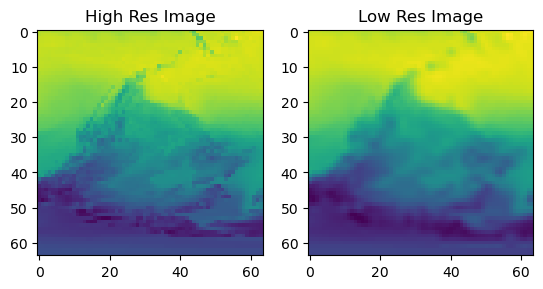

In [147]:
plt.subplot(121)
plt.imshow(high_res)
plt.title('High Res Image')
plt.subplot(122)
plt.imshow(low_res)
plt.title('Low Res Image')
#plt.savefig('/Users/ryaneagan/Desktop/test_output.png')

torch.Size([1, 64, 64])
(1, 64, 64)


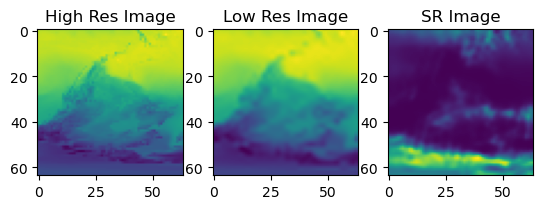

In [155]:

model = models.Generator(1,UPSCALE_FACTOR).eval()

model.load_state_dict(torch.load(MODEL_NAME), strict=False)

image = torch.nan_to_num(torch.from_numpy(low_res).float()).unsqueeze(0)
#image = image[None,:,:,:]
out = model(image)
print(out.shape)
out_np = out.detach().numpy()
print(out_np.shape)
out_image = ToPILImage()(out[0].data.cpu())
#out_image.save('out_srf_' + str(UPSCALE_FACTOR) + '_' + IMAGE_NAME)

plt.subplot(131)
plt.imshow(high_res)
plt.title('High Res Image')
plt.subplot(132)
plt.imshow(low_res)
plt.title('Low Res Image')
plt.subplot(133)
plt.imshow(out_np[0,:,:])
plt.title('SR Image')
plt.savefig('/Users/ryaneagan/Desktop/test_output.png')

In [141]:
out_np

array([[[[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         ...,
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]]]], dtype=float32)